###  Dataset Read

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum() #check null value 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

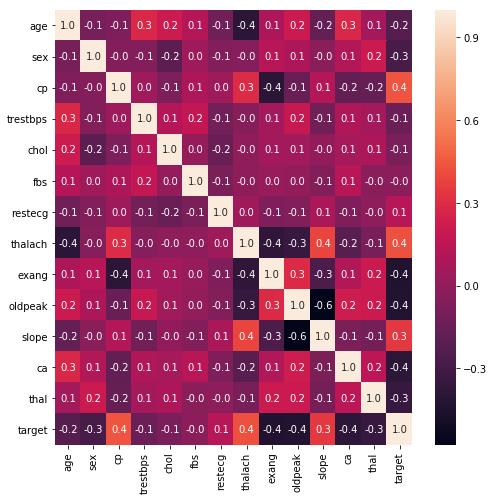

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.1f')# confusion matrix of dataset
plt.show()

In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

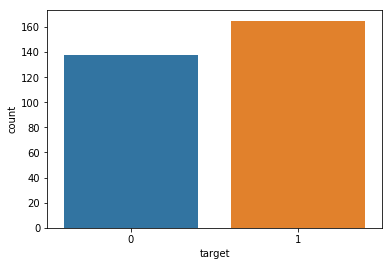

In [11]:
sns.countplot(x="target", data=df)
plt.show()

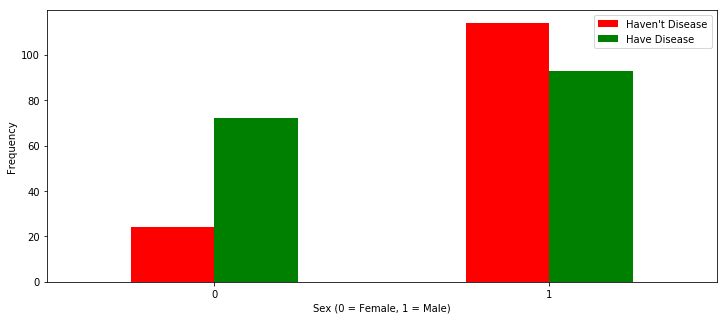

In [12]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(12,5),color=['red','green' ])
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

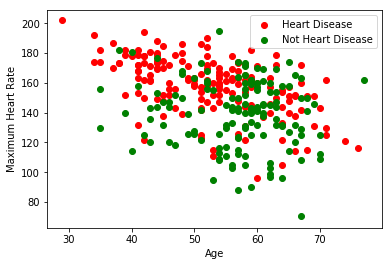

In [13]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)],c="green")
plt.legend(["Heart Disease", "Not Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [14]:
x = df.drop(['target'], axis = 1)
y = df.target.values

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#### Train test devide

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=101)

### Preprocess with MinMaxScaler 

In [17]:
stdc=MinMaxScaler()
x_train=stdc.fit_transform(x_train)
x_test=stdc.transform(x_test)


#### Naive Bias

In [18]:
gnb = MultinomialNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print("Confusion Matrix for Gaussian Naive Bayes:")
print(confusion_matrix(y_test,predgnb))
print("Score:",round(accuracy_score(y_test,predgnb)*100,2))
print("Classification Report:",classification_report(y_test,predgnb))

Confusion Matrix for Gaussian Naive Bayes:
[[21 10]
 [ 4 26]]
Score: 77.05
Classification Report:              precision    recall  f1-score   support

          0       0.84      0.68      0.75        31
          1       0.72      0.87      0.79        30

avg / total       0.78      0.77      0.77        61



In [20]:
acc1=metrics.accuracy_score(y_test, predgnb)
print("Accuracy:",round(acc1*100),"%")

Accuracy: 77.0 %


#### SVM

In [21]:
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[21 10]
 [ 3 27]]
Score: 78.69
Classification Report:              precision    recall  f1-score   support

          0       0.88      0.68      0.76        31
          1       0.73      0.90      0.81        30

avg / total       0.80      0.79      0.78        61



In [22]:
acc2=metrics.accuracy_score(y_test,predsvm)
print("Accuracy:",acc2*100,"%")

Accuracy: 78.68852459016394 %


#### Decision Tree

In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[23  8]
 [ 1 29]]
Score: 85.25
Classification Report:              precision    recall  f1-score   support

          0       0.96      0.74      0.84        31
          1       0.78      0.97      0.87        30

avg / total       0.87      0.85      0.85        61



In [24]:
acc3=metrics.accuracy_score(y_test,preddt)
print("Accuracy:",round(acc3*100),"%")

Accuracy: 85.0 %


#### Accuracy Comparison graph

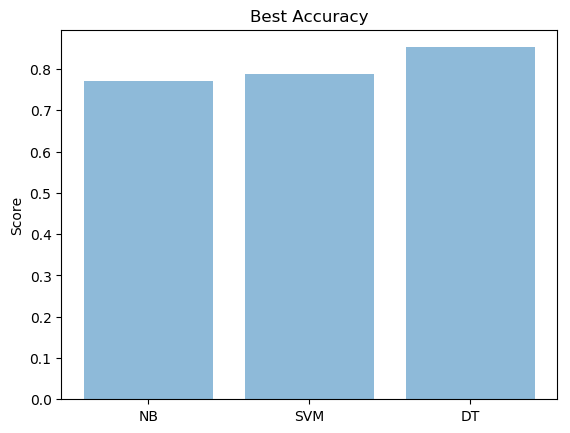

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('NB','SVM','DT')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Best Accuracy')

plt.show()

#### Test output

In [26]:
age=int(input("Enter age :"))
sex=int(input("Enter sex :"))
cp=int(input("Enter cp :"))
trestbps=int(input("Enter trestbps :"))
chol=int(input("Enter chol :"))
fbs=int(input("Enter fbs :"))
restecg=int(input("Enter restecg :"))
thalach=int(input("Enter thalach :"))
exang=int(input("Enter exang :"))
oldpeak=float(input("Enter oldpeak: "))
slope=int(input("Enter slope :"))
ca=int(input("Enter ca :"))
thal=int(input("Enter thal :"))

Enter age :63
Enter sex :1
Enter cp :3
Enter trestbps :145
Enter chol :233
Enter fbs :1
Enter restecg :0
Enter thalach :150
Enter exang :0
Enter oldpeak: 2.3
Enter slope :0
Enter ca :0
Enter thal :1


In [27]:
testresult1=gnb.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
print(testresult1)

[1]


In [28]:
print("Naive Bias algorithm Prediction Result")
if testresult1==1:
    print("Have heart Disease")
else:
    print("Have not heart  Disease")

Naive Bias algorithm Prediction Result
Have heart Disease


In [29]:
testresult2=svm.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
print(testresult2)

[1]


In [30]:
print("Support Vector algorithm Prediction Result")
if testresult2==1:
    print("Have Heart Disease")
else:
    print("Have not  Heart Disease")

Support Vector algorithm Prediction Result
Have Heart Disease


In [31]:
testresult3=dt.predict([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
print(testresult3)

[1]


In [32]:
print("Decision Tree algorithm Prediction Result")
if testresult3==1:
    print("Have heart Disease")
else:
    print("Have not heart  Disease")

Decision Tree algorithm Prediction Result
Have heart Disease
